In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

In [2]:


def extract_metrics(content):

    patterns = {
        "Only_KNAPSACK_efficiency": r"Only KNAPSACK\s+efficiency:\s+([\d.]+)",
        "Final_Knapsack_time": r"Final Knapsack time:\s+([\d.e+-]+)",

        "Only_SFC_efficiency": r"Only SFC\s+efficiency:\s+([\d.]+)",
        "Final_SFC_time": r"Final SFC time:\s+([\d.e+-]+)",

        "SFC_painterPartition_efficiency": r"SFC\+painterPartition\s+efficiency:\s+([\d.]+)",
        "Final_SFC_Painter_time": r"Final SFC\+Painter time:\s+([\d.e+-]+)",

        "Painter_Knapsack_combined_efficiency": r"Painter\+Knapsack combined efficiency:\s+([\d.]+)",
        "Final_Painter_Knapsack_Combined_time": r"Final painter\+Knapsack_Combined time:\s+([\d.e+-]+)",

        "SFC_Knapsack_combined_efficiency": r"SFC\+Knapsack combined efficiency:\s+([\d.]+)",
        "Final_SFC_Knapsack_Combined_time": r"Final SFC\+Knapsack_Combined time:\s+([\d.e+-]+)",
    }

    run_sections = re.split(r"=== Starting Run \d+ ===", content)[1:]  
    data = []

    for run_id, section in enumerate(run_sections, start=1):
        row = {"Run": run_id}
        for key, pattern in patterns.items():
            match = re.search(pattern, section)
            if match:
                row[key] = float(match.group(1))
            else:
                row[key] = None  
        data.append(row)
    
    return data


def consolidate_data_from_files(file_list):
    all_data = []
    
    for file_path in file_list:
        with open(file_path, 'r') as file:
            content = file.read()
        
        file_data = extract_metrics(content)
        for row in file_data:
            row["File"] = file_path
        all_data.extend(file_data)
    
    return pd.DataFrame(all_data)

file_paths = ['../output/run_250/4_4_output_avg.txt', '../output/run_250/4_8_output_avg.txt', '../output/run_250/4_16_output_avg.txt',
              '../output/run_250/8_4_output_avg.txt', '../output/run_250/8_8_output_avg.txt', '../output/run_250/8_16_output_avg.txt',
              '../output/run_250/16_4_output_avg.txt', '../output/run_250/16_8_output_avg.txt', '../output/run_250/16_16_output_avg.txt',
              '../output/run_250/32_4_output_avg.txt', '../output/run_250/32_8_output_avg.txt', '../output/run_250/32_16_output_avg.txt',
              '../output/run_250/64_4_output_avg.txt', '../output/run_250/64_8_output_avg.txt', '../output/run_250/64_16_output_avg.txt',
              '../output/run_250/128_4_output_avg.txt', '../output/run_250/128_8_output_avg.txt', '../output/run_250/128_16_output_avg.txt',
              '../output/run_250/256_4_output_avg.txt', '../output/run_250/256_8_output_avg.txt', '../output/run_250/256_16_output_avg.txt',
              '../output/run_250/512_4_output_avg.txt','../output/run_250/512_8_output_avg.txt','../output/run_250/512_16_output_avg.txt']
            #   '../output/run_250/1024_4_output_avg.txt','../output/run_250/1024_8_output_avg.txt','../output/run_250/1024_16_output_avg.txt']
            #   '../output/run_250/2048_4_output_avg.txt','../output/run_250/2048_8_output_avg.txt','../output/run_250/2048_16_output_avg.txt']




result_df = consolidate_data_from_files(file_paths)




In [3]:
result_df

Run  Only_KNAPSACK_efficiency  Final_Knapsack_time  Only_SFC_efficiency  \
0       1                  0.994643             0.001870             0.815391   
1       2                  0.997255             0.001855             0.818026   
2       3                  0.996655             0.001623             0.981356   
3       4                  0.999372             0.001614             0.818634   
4       5                  0.993700             0.001527             0.810148   
...   ...                       ...                  ...                  ...   
5995  246                  0.999158             0.144513             0.943715   
5996  247                  0.999121             0.139402             0.943519   
5997  248                  0.999164             0.156960             0.943418   
5998  249                  0.999165             0.137922             0.940992   
5999  250                  0.999194             0.141404             0.941604   

      Final_SFC_time  SFC_painterPartition_efficiency  Final_SFC_Painter_time  \
0           0.001446                         0.974292                0.000168   
1           0.001375                         0.991052                0.000140   
2           0.001324                         0.981356                0.000135   
3           0.001459                         0.978172                0.000146   
4           0.001310                         0.965230                0.000168   
...              ...                              ...                     ...   
5995        0.075999                         0.971451                0.173584   
5996        0.070987                         0.972042                0.179871   
5997        0.070531                         0.971910                0.173567   
5998        0.073803                         0.972775                0.177857   
5999        0.068144                         0.971449                0.174485   

      Painter_Knapsack_combined_efficiency  \
0                                 0.994643   
1                                 0.997255   
2                                 0.996655   
3                                 0.999372   
4                                 0.993700   
...                                    ...   
5995                              0.953070   
5996                              0.952189   
5997                              0.953852   
5998                              0.953500   
5999                              0.953604   

      Final_Painter_Knapsack_Combined_time  SFC_Knapsack_combined_efficiency  \
0                                 0.000995                          0.994643   
1                                 0.000923                          0.997255   
2                                 0.000901                          0.996655   
3                                 0.000972                          0.999372   
4                                 0.000918                          0.993700   
...                                    ...                               ...   
5995                              0.214589                          0.948426   
5996                              0.216665                          0.948365   
5997                              0.207441                          0.946789   
5998                              0.216694                          0.947890   
5999                              0.216851                          0.947591   

      Final_SFC_Knapsack_Combined_time  \
0                             0.001002   
1                             0.000964   
2                             0.000858   
3                             0.000971   
4                             0.000887   
...                                ...   
5995                          0.044059   
5996                          0.041713   
5997                          0.041047   
5998                          0.042047   
5999                          0.040244   

                                         

In [4]:
result_df.head(10)

Run  Only_KNAPSACK_efficiency  Final_Knapsack_time  Only_SFC_efficiency  \
0    1                  0.994643             0.001870             0.815391   
1    2                  0.997255             0.001855             0.818026   
2    3                  0.996655             0.001623             0.981356   
3    4                  0.999372             0.001614             0.818634   
4    5                  0.993700             0.001527             0.810148   
5    6                  0.999622             0.001651             0.810492   
6    7                  0.997701             0.001643             0.814776   
7    8                  0.998635             0.001643             0.824507   
8    9                  0.999667             0.001605             0.821331   
9   10                  0.998125             0.001675             0.807424   

   Final_SFC_time  SFC_painterPartition_efficiency  Final_SFC_Painter_time  \
0        0.001446                         0.974292                0.000168   
1        0.001375                         0.991052                0.000140   
2        0.001324                         0.981356                0.000135   
3        0.001459                         0.978172                0.000146   
4        0.001310                         0.965230                0.000168   
5        0.001361                         0.993903                0.000157   
6        0.001334                         0.961634                0.000147   
7        0.001324                         0.960280                0.000153   
8        0.001312                         0.982283                0.000155   
9        0.001381                         0.986144                0.000159   

   Painter_Knapsack_combined_efficiency  Final_Painter_Knapsack_Combined_time  \
0                              0.994643                              0.000995   
1                              0.997255                              0.000923   
2                              0.996655                              0.000901   
3                              0.999372                              0.000972   
4                              0.993700                              0.000918   
5                              0.999622                              0.000893   
6                              0.997701                              0.000923   
7                              0.998635                              0.000875   
8                              0.999667                              0.000865   
9                              0.998125                              0.000962   

   SFC_Knapsack_combined_efficiency  Final_SFC_Knapsack_Combined_time  \
0                          0.994643                          0.001002   
1                          0.997255                          0.000964   
2                          0.996655                          0.000858   
3                          0.999372                          0.000971   
4                          0.993700                          0.000887   
5                          0.999622                          0.000892   
6                          0.997701                          0.000903   
7                          0.998635                          0.000919   
8                          0.999667                          0.000851   
9                          0.998125                          0.000889   

                                   File  
0  ../output/run_250/4_4_output_avg.txt  
1  ../output/run_250/4_4_output_avg.txt  
2  ../output/run_250/4_4_output_avg.txt  
3  ../output/run_250/4_4_output_avg.txt  
4  ../output/run_250/4_4_output_avg.txt  
5  ../output/run_250/4_4_output_avg.txt  
6  ../output/run_250/4_4_output_avg.txt  
7  ../output/run_250/4_4_output_avg.txt  
8  ../output/run_250/4_4_output_avg.txt  
9  ../output/run_250/4_4_output_avg.txt

In [5]:
result_df['File'] = result_df['File'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

In [6]:
result_df['File'] = result_df['File'].apply(lambda x: '_'.join([word.capitalize() for word in x.split('_')]))

In [7]:
result_df

Run  Only_KNAPSACK_efficiency  Final_Knapsack_time  Only_SFC_efficiency  \
0       1                  0.994643             0.001870             0.815391   
1       2                  0.997255             0.001855             0.818026   
2       3                  0.996655             0.001623             0.981356   
3       4                  0.999372             0.001614             0.818634   
4       5                  0.993700             0.001527             0.810148   
...   ...                       ...                  ...                  ...   
5995  246                  0.999158             0.144513             0.943715   
5996  247                  0.999121             0.139402             0.943519   
5997  248                  0.999164             0.156960             0.943418   
5998  249                  0.999165             0.137922             0.940992   
5999  250                  0.999194             0.141404             0.941604   

      Final_SFC_time  SFC_painterPartition_efficiency  Final_SFC_Painter_time  \
0           0.001446                         0.974292                0.000168   
1           0.001375                         0.991052                0.000140   
2           0.001324                         0.981356                0.000135   
3           0.001459                         0.978172                0.000146   
4           0.001310                         0.965230                0.000168   
...              ...                              ...                     ...   
5995        0.075999                         0.971451                0.173584   
5996        0.070987                         0.972042                0.179871   
5997        0.070531                         0.971910                0.173567   
5998        0.073803                         0.972775                0.177857   
5999        0.068144                         0.971449                0.174485   

      Painter_Knapsack_combined_efficiency  \
0                                 0.994643   
1                                 0.997255   
2                                 0.996655   
3                                 0.999372   
4                                 0.993700   
...                                    ...   
5995                              0.953070   
5996                              0.952189   
5997                              0.953852   
5998                              0.953500   
5999                              0.953604   

      Final_Painter_Knapsack_Combined_time  SFC_Knapsack_combined_efficiency  \
0                                 0.000995                          0.994643   
1                                 0.000923                          0.997255   
2                                 0.000901                          0.996655   
3                                 0.000972                          0.999372   
4                                 0.000918                          0.993700   
...                                    ...                               ...   
5995                              0.214589                          0.948426   
5996                              0.216665                          0.948365   
5997                              0.207441                          0.946789   
5998                              0.216694                          0.947890   
5999                              0.216851                          0.947591   

      Final_SFC_Knapsack_Combined_time               File  
0                             0.001002     4_4_Output_Avg  
1                             0.000964     4_4_Output_Avg  
2                             0.000858     4_4_Output_Avg  
3                             0.000971     4_4_Output_Avg  
4                             0.000887     4_4_Output_Avg  
...                                ...                ...  
5995                          0.044059  512_16_Output_Avg  
5996                          0.041713  512_16_Output_Avg  
5997  

In [8]:
result_df = result_df.rename(columns={'Only_KNAPSACK_efficiency': 'Only_Knapsack_Efficiency', 'Final_Knapsack_time': 'Only_Knapsack_Final_Time', 'Only_SFC_efficiency':'Only_SFC_Efficiency','Final_SFC_time': 'Only_SFC_Final_Time','SFC_painterPartition_efficiency': 'SFC_PainterPartition_Efficiency','Final_SFC_Painter_time': 'SFC_PainterPartition_Final_Time','Painter_Knapsack_combined_efficiency':'Painter_Knapsack_Combined_Efficiency','Final_Painter_Knapsack_Combined_time':'Painter_Knapsack_Combined_Final_Time','SFC_Knapsack_combined_efficiency':'SFC_Knapsack_Combined_Efficiency','Final_SFC_Knapsack_Combined_time':'SFC_Knapsack_Combined_Final_Time'} )

In [9]:
result_df

Run  Only_Knapsack_Efficiency  Only_Knapsack_Final_Time  \
0       1                  0.994643                  0.001870   
1       2                  0.997255                  0.001855   
2       3                  0.996655                  0.001623   
3       4                  0.999372                  0.001614   
4       5                  0.993700                  0.001527   
...   ...                       ...                       ...   
5995  246                  0.999158                  0.144513   
5996  247                  0.999121                  0.139402   
5997  248                  0.999164                  0.156960   
5998  249                  0.999165                  0.137922   
5999  250                  0.999194                  0.141404   

      Only_SFC_Efficiency  Only_SFC_Final_Time  \
0                0.815391             0.001446   
1                0.818026             0.001375   
2                0.981356             0.001324   
3                0.818634             0.001459   
4                0.810148             0.001310   
...                   ...                  ...   
5995             0.943715             0.075999   
5996             0.943519             0.070987   
5997             0.943418             0.070531   
5998             0.940992             0.073803   
5999             0.941604             0.068144   

      SFC_PainterPartition_Efficiency  SFC_PainterPartition_Final_Time  \
0                            0.974292                         0.000168   
1                            0.991052                         0.000140   
2                            0.981356                         0.000135   
3                            0.978172                         0.000146   
4                            0.965230                         0.000168   
...                               ...                              ...   
5995                         0.971451                         0.173584   
5996                         0.972042                         0.179871   
5997                         0.971910                         0.173567   
5998                         0.972775                         0.177857   
5999                         0.971449                         0.174485   

      Painter_Knapsack_Combined_Efficiency  \
0                                 0.994643   
1                                 0.997255   
2                                 0.996655   
3                                 0.999372   
4                                 0.993700   
...                                    ...   
5995                              0.953070   
5996                              0.952189   
5997                              0.953852   
5998                              0.953500   
5999                              0.953604   

      Painter_Knapsack_Combined_Final_Time  SFC_Knapsack_Combined_Efficiency  \
0                                 0.000995                          0.994643   
1                                 0.000923                          0.997255   
2                                 0.000901                          0.996655   
3                                 0.000972                          0.999372   
4                                 0.000918                          0.993700   
...                                    ...                               ...   
5995                              0.214589                          0.948426   
5996                              0.216665                          0.948365   
5997                              0.207441                          0.946789   
5998                              0.216694                          0.947890   
5999                              0.216851                          0.947591   

      SFC_Knapsack_Combined_Final_Time               File  
0                             0.001002     4_4_Output_Avg  
1                             0.000964     4_4_Output_Avg  
2                             0.000858   

In [10]:
column_list = result_df['SFC_Knapsack_Combined_Efficiency'].tolist()

In [11]:
print(column_list)

[0.9946432609, 0.9972552875, 0.9966546884, 0.9993720645, 0.9937002576, 0.999621658, 0.9977011885, 0.9986352217, 0.9996667745, 0.9981246738, 0.9986723298, 0.9984817052, 0.9983781774, 0.9954385237, 0.9970528437, 0.9994342936, 0.9989314034, 0.9973672907, 0.9910027726, 0.9933692639, 0.9962955164, 0.9956138602, 0.9983701659, 0.9974874309, 0.9942123373, 0.9936067056, 0.9965815006, 0.9949556836, 0.9931758438, 0.9950979564, 0.9994067201, 0.9975743843, 0.9980881499, 0.9904236121, 0.9949611184, 0.992980312, 0.9961169785, 0.9938876452, 0.9932745021, 0.9956505499, 0.9988566058, 0.9983616792, 0.9925742839, 0.9938959843, 0.9986490213, 0.9930048481, 0.9991232573, 0.995311297, 0.9964211579, 0.9947419912, 0.9970189079, 0.9950983179, 0.9933850355, 0.9948886798, 0.9968319478, 0.9909870781, 0.9907261365, 0.9971402416, 0.9983763864, 0.9976407165, 0.995808645, 0.9981424914, 0.9938097814, 0.9963254308, 0.9986135846, 0.9977416981, 0.9980000895, 0.9960479933, 0.996436519, 0.9976520741, 0.993281212, 0.996996223

In [12]:
# output_file = "./result/data.xlsx"

# with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
#     for file_name, group in result_df.groupby('File', sort=False):
#         sheet_name = file_name.split("/")[-1].replace(".txt", "")
#         group.to_excel(writer, sheet_name=sheet_name, index=False)


In [13]:
filename = '4_4_Output_Avg'
df_1 = result_df[result_df['File'] == filename]

In [14]:
df_1

Run  Only_Knapsack_Efficiency  Only_Knapsack_Final_Time  \
0      1                  0.994643                  0.001870   
1      2                  0.997255                  0.001855   
2      3                  0.996655                  0.001623   
3      4                  0.999372                  0.001614   
4      5                  0.993700                  0.001527   
..   ...                       ...                       ...   
245  246                  0.998249                  0.001556   
246  247                  0.993969                  0.001569   
247  248                  0.998267                  0.001498   
248  249                  0.993977                  0.001548   
249  250                  0.994548                  0.002620   

     Only_SFC_Efficiency  Only_SFC_Final_Time  \
0               0.815391             0.001446   
1               0.818026             0.001375   
2               0.981356             0.001324   
3               0.818634             0.001459   
4               0.810148             0.001310   
..                   ...                  ...   
245             0.809682             0.001278   
246             0.795258             0.001251   
247             0.799844             0.001224   
248             0.974880             0.001193   
249             0.795271             0.001287   

     SFC_PainterPartition_Efficiency  SFC_PainterPartition_Final_Time  \
0                           0.974292                         0.000168   
1                           0.991052                         0.000140   
2                           0.981356                         0.000135   
3                           0.978172                         0.000146   
4                           0.965230                         0.000168   
..                               ...                              ...   
245                         0.994058                         0.000155   
246                         0.993846                         0.000157   
247                         0.991790                         0.000138   
248                         0.974880                         0.000145   
249                         0.976363                         0.000138   

     Painter_Knapsack_Combined_Efficiency  \
0                                0.994643   
1                                0.997255   
2                                0.996655   
3                                0.999372   
4                                0.993700   
..                                    ...   
245                              0.998249   
246                              0.993969   
247                              0.998267   
248                              0.993977   
249                              0.994548   

     Painter_Knapsack_Combined_Final_Time  SFC_Knapsack_Combined_Efficiency  \
0                                0.000995                          0.994643   
1                                0.000923                          0.997255   
2                                0.000901                          0.996655   
3                                0.000972                          0.999372   
4                                0.000918                          0.993700   
..                                    ...                               ...   
245                              0.000844                          0.998249   
246                              0.000836                          0.993969   
247                              0.000786                          0.998267   
248                              0.000824                          0.993977   
249                              0.000835                          0.994548   

     SFC_Knapsack_Combined_Final_Time            File  
0                            0.001002  4_4_Output_Avg  
1                            0.000964  4_4_Output_Avg  
2                            0.000858  4_4_Output_Avg  
3                            0.000971  4_4_Output_Avg  


In [15]:
pd.set_option('display.max_columns', None)

In [16]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# file_order = result_df['File'].drop_duplicates().tolist()
# result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

# grouped = result_df.groupby('File', sort=False)

# for file_name, group in grouped:
#     group = group.sort_values('Run')

#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Efficiency Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Efficiency', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, eff_col, _ in algorithms:
#         ax.plot(group['Run'], group[eff_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     efficiency_filename = f'./result/all_run_data/{file_name}_efficiency.png'
#     plt.savefig(efficiency_filename, dpi=600)
#     plt.show()
#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Time Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Time (seconds)', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, _, time_col in algorithms:
#         ax.plot(group['Run'], group[time_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     time_filename = f'./result/all_run_data/{file_name}_time.png'
#     plt.savefig(time_filename, dpi=600)
#     plt.show()


In [17]:
file_order = result_df['File'].drop_duplicates().tolist()
result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

grouped = result_df.groupby('File', sort=False)


/tmp/ipykernel_1605682/3567121358.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False)


In [18]:
specific_group = grouped.get_group('4_8_Output_Avg')
specific_group

Run  Only_Knapsack_Efficiency  Only_Knapsack_Final_Time  \
250    1                  0.998303                  0.001652   
251    2                  0.997171                  0.001657   
252    3                  0.999281                  0.001640   
253    4                  0.998640                  0.001617   
254    5                  0.997853                  0.001609   
..   ...                       ...                       ...   
495  246                  0.998283                  0.001512   
496  247                  0.999293                  0.001507   
497  248                  0.998238                  0.001597   
498  249                  0.995573                  0.001602   
499  250                  0.997980                  0.001522   

     Only_SFC_Efficiency  Only_SFC_Final_Time  \
250             0.992885             0.001407   
251             0.897201             0.001369   
252             0.896109             0.001328   
253             0.887199             0.001323   
254             0.915714             0.001382   
..                   ...                  ...   
495             0.890519             0.001253   
496             0.897145             0.001217   
497             0.890904             0.001283   
498             0.932436             0.001242   
499             0.908828             0.001314   

     SFC_PainterPartition_Efficiency  SFC_PainterPartition_Final_Time  \
250                         0.992885                         0.000157   
251                         0.997033                         0.000135   
252                         0.981532                         0.000138   
253                         0.985964                         0.000145   
254                         0.974509                         0.000133   
..                               ...                              ...   
495                         0.987609                         0.000151   
496                         0.991286                         0.000140   
497                         0.976226                         0.000138   
498                         0.980771                         0.000158   
499                         0.976224                         0.000142   

     Painter_Knapsack_Combined_Efficiency  \
250                              0.998303   
251                              0.997171   
252                              0.999281   
253                              0.998640   
254                              0.997853   
..                                    ...   
495                              0.998283   
496                              0.999293   
497                              0.998238   
498                              0.995573   
499                              0.997980   

     Painter_Knapsack_Combined_Final_Time  SFC_Knapsack_Combined_Efficiency  \
250                              0.000949                          0.998303   
251                              0.000881                          0.997171   
252                              0.001068                          0.999281   
253                              0.001068                          0.998640   
254                              0.000912                          0.997853   
..                                    ...                               ...   
495                              0.000822                          0.998283   
496                              0.000834                          0.999293   
497                              0.000865                          0.998238   
498                              0.000911                          0.995573   
499                              0.000853                          0.997980   

     SFC_Knapsack_Combined_Final_Time            File  
250                          0.000895  4_8_Output_Avg  
251                          0.000896  4_8_Output_Avg  
252                          0.000895  4_8_Output_Avg  
253                          0.000920  4_8_Output_Avg  


In [19]:
specific_group = specific_group['Only_Knapsack_Efficiency'].mean()
specific_group

np.float64(0.9983229487516)

In [20]:
efficiency_cols = [
    'Only_Knapsack_Efficiency',
    'SFC_PainterPartition_Efficiency',
    'Painter_Knapsack_Combined_Efficiency',
    'Only_SFC_Efficiency',
    'SFC_Knapsack_Combined_Efficiency'
]

time_cols = [
    'Only_Knapsack_Final_Time',
    'SFC_PainterPartition_Final_Time',
    'Painter_Knapsack_Combined_Final_Time',
    'Only_SFC_Final_Time',
    'SFC_Knapsack_Combined_Final_Time'
]

all_cols = efficiency_cols + time_cols

unique_files = result_df['File'].drop_duplicates()
result_df['File'] = pd.Categorical(result_df['File'], categories=unique_files, ordered=True)
agg_funcs = {col: ['mean', 'std', 'min', 'max'] for col in all_cols}
grouped = result_df.groupby('File', sort=False).agg(agg_funcs)
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()
grouped['File'] = pd.Categorical(grouped['File'], categories=unique_files, ordered=True)
grouped = grouped.sort_values('File')

/tmp/ipykernel_1605682/1353519746.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False).agg(agg_funcs)


In [21]:
grouped

File  Only_Knapsack_Efficiency_mean  \
0      4_4_Output_Avg                       0.996196   
1      4_8_Output_Avg                       0.998323   
2     4_16_Output_Avg                       0.999247   
3      8_4_Output_Avg                       0.995743   
4      8_8_Output_Avg                       0.998136   
5     8_16_Output_Avg                       0.999159   
6     16_4_Output_Avg                       0.995467   
7     16_8_Output_Avg                       0.997973   
8    16_16_Output_Avg                       0.999141   
9     32_4_Output_Avg                       0.995263   
10    32_8_Output_Avg                       0.998015   
11   32_16_Output_Avg                       0.999125   
12    64_4_Output_Avg                       0.995112   
13    64_8_Output_Avg                       0.998000   
14   64_16_Output_Avg                       0.999146   
15   128_4_Output_Avg                       0.994986   
16   128_8_Output_Avg                       0.998044   
17  128_16_Output_Avg                       0.999148   
18   256_4_Output_Avg                       0.994913   
19   256_8_Output_Avg                       0.998047   
20  256_16_Output_Avg                       0.999160   
21   512_4_Output_Avg                       0.994847   
22   512_8_Output_Avg                       0.998025   
23  512_16_Output_Avg                       0.999161   

    Only_Knapsack_Efficiency_std  Only_Knapsack_Efficiency_min  \
0                       0.002378                      0.986188   
1                       0.001056                      0.994658   
2                       0.000446                      0.997695   
3                       0.002108                      0.984526   
4                       0.000827                      0.994697   
5                       0.000362                      0.997977   
6                       0.001684                      0.990538   
7                       0.000685                      0.995658   
8                       0.000265                      0.998346   
9                       0.001173                      0.990320   
10                      0.000526                      0.995733   
11                      0.000200                      0.998514   
12                      0.000991                      0.986387   
13                      0.000391                      0.996786   
14                      0.000148                      0.998608   
15                      0.000712                      0.989269   
16                      0.000269                      0.997052   
17                      0.000121                      0.998640   
18                      0.000618                      0.989932   
19                      0.000216                      0.997444   
20                      0.000091                      0.998837   
21                      0.000423                      0.991713   
22                      0.000144                      0.997656   
23                      0.000066                      0.998944   

    Only_Knapsack_Efficiency_max  SFC_PainterPartition_Efficiency_mean  \
0                       0.999667                              0.976759   
1                       0.999847                              0.984370   
2                       0.999935                              0.988457   
3                       0.999199                              0.969676   
4                       0.999586                              0.977538   
5                       0.999854                              0.983998   
6                       0.998748                              0.962234   
7                       0.999564                              0.972110   
8                       0.999785                              0.980338   
9                       0.998078                              0.955549   
10                      0.999454                              0.968333   
11                      0.999598                              0.977662   
12 

In [22]:
grouped['File'] = grouped['File'].str.replace(r'(\d+)_(\d+)_Output_Avg', r'\1R_\2BPR', regex=True)

In [23]:
grouped

File  Only_Knapsack_Efficiency_mean  Only_Knapsack_Efficiency_std  \
0      4R_4BPR                       0.996196                      0.002378   
1      4R_8BPR                       0.998323                      0.001056   
2     4R_16BPR                       0.999247                      0.000446   
3      8R_4BPR                       0.995743                      0.002108   
4      8R_8BPR                       0.998136                      0.000827   
5     8R_16BPR                       0.999159                      0.000362   
6     16R_4BPR                       0.995467                      0.001684   
7     16R_8BPR                       0.997973                      0.000685   
8    16R_16BPR                       0.999141                      0.000265   
9     32R_4BPR                       0.995263                      0.001173   
10    32R_8BPR                       0.998015                      0.000526   
11   32R_16BPR                       0.999125                      0.000200   
12    64R_4BPR                       0.995112                      0.000991   
13    64R_8BPR                       0.998000                      0.000391   
14   64R_16BPR                       0.999146                      0.000148   
15   128R_4BPR                       0.994986                      0.000712   
16   128R_8BPR                       0.998044                      0.000269   
17  128R_16BPR                       0.999148                      0.000121   
18   256R_4BPR                       0.994913                      0.000618   
19   256R_8BPR                       0.998047                      0.000216   
20  256R_16BPR                       0.999160                      0.000091   
21   512R_4BPR                       0.994847                      0.000423   
22   512R_8BPR                       0.998025                      0.000144   
23  512R_16BPR                       0.999161                      0.000066   

    Only_Knapsack_Efficiency_min  Only_Knapsack_Efficiency_max  \
0                       0.986188                      0.999667   
1                       0.994658                      0.999847   
2                       0.997695                      0.999935   
3                       0.984526                      0.999199   
4                       0.994697                      0.999586   
5                       0.997977                      0.999854   
6                       0.990538                      0.998748   
7                       0.995658                      0.999564   
8                       0.998346                      0.999785   
9                       0.990320                      0.998078   
10                      0.995733                      0.999454   
11                      0.998514                      0.999598   
12                      0.986387                      0.997340   
13                      0.996786                      0.999056   
14                      0.998608                      0.999499   
15                      0.989269                      0.996523   
16                      0.997052                      0.998960   
17                      0.998640                      0.999441   
18                      0.989932                      0.996023   
19                      0.997444                      0.998858   
20                      0.998837                      0.999384   
21                      0.991713                      0.995867   
22                      0.997656                      0.998416   
23                      0.998944                      0.999371   

    SFC_PainterPartition_Efficiency_mean  SFC_PainterPartition_Efficiency_std  \
0                               0.976759                             0.010257   
1                               0.984370                             0.007285   
2                               0.988457                             0.005162   
3                               0.969676                   

In [24]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# Error Bar Plot

Mean values for each algorithm and file as the central point.
Variability using error bars for standard deviations.

Use a bar or point plot for the mean and add error bars based on the standard deviation.
Place all algorithms side-by-side (grouped bars) or overlay them to compare their average performance and variability for each file.


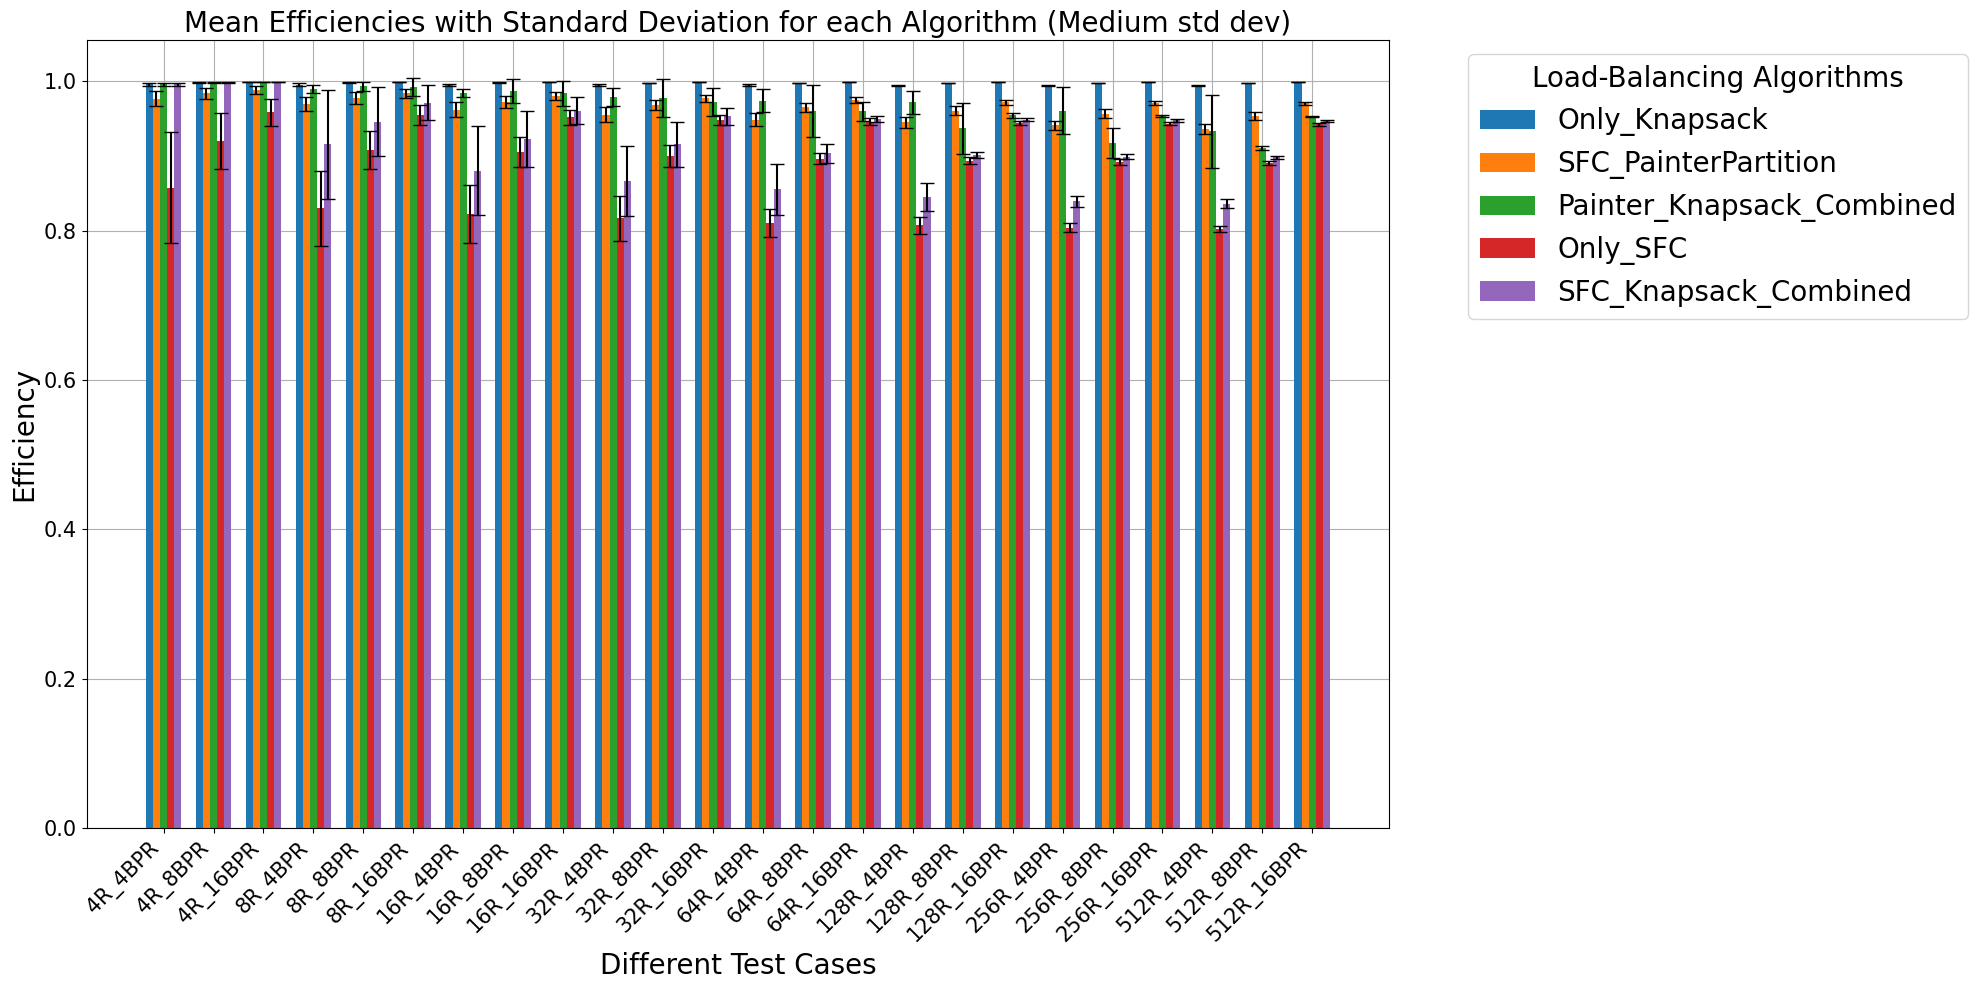

In [25]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(algorithms)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(algorithms):
    mean_col = f'{alg}_Efficiency_mean'
    std_col = f'{alg}_Efficiency_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
    
ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Efficiency', fontsize=20)
ax.set_title('Mean Efficiencies with Standard Deviation for each Algorithm (Medium std dev)', fontsize=20)
ax.set_xticks(x + width * (num_algorithms - 1) / 2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

plt.margins(x=0.05)
plt.tight_layout()
# plt.savefig('../result/new_result/result_avg/efficiency_errorbarplot.png', dpi=600)
plt.show()

In [ ]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

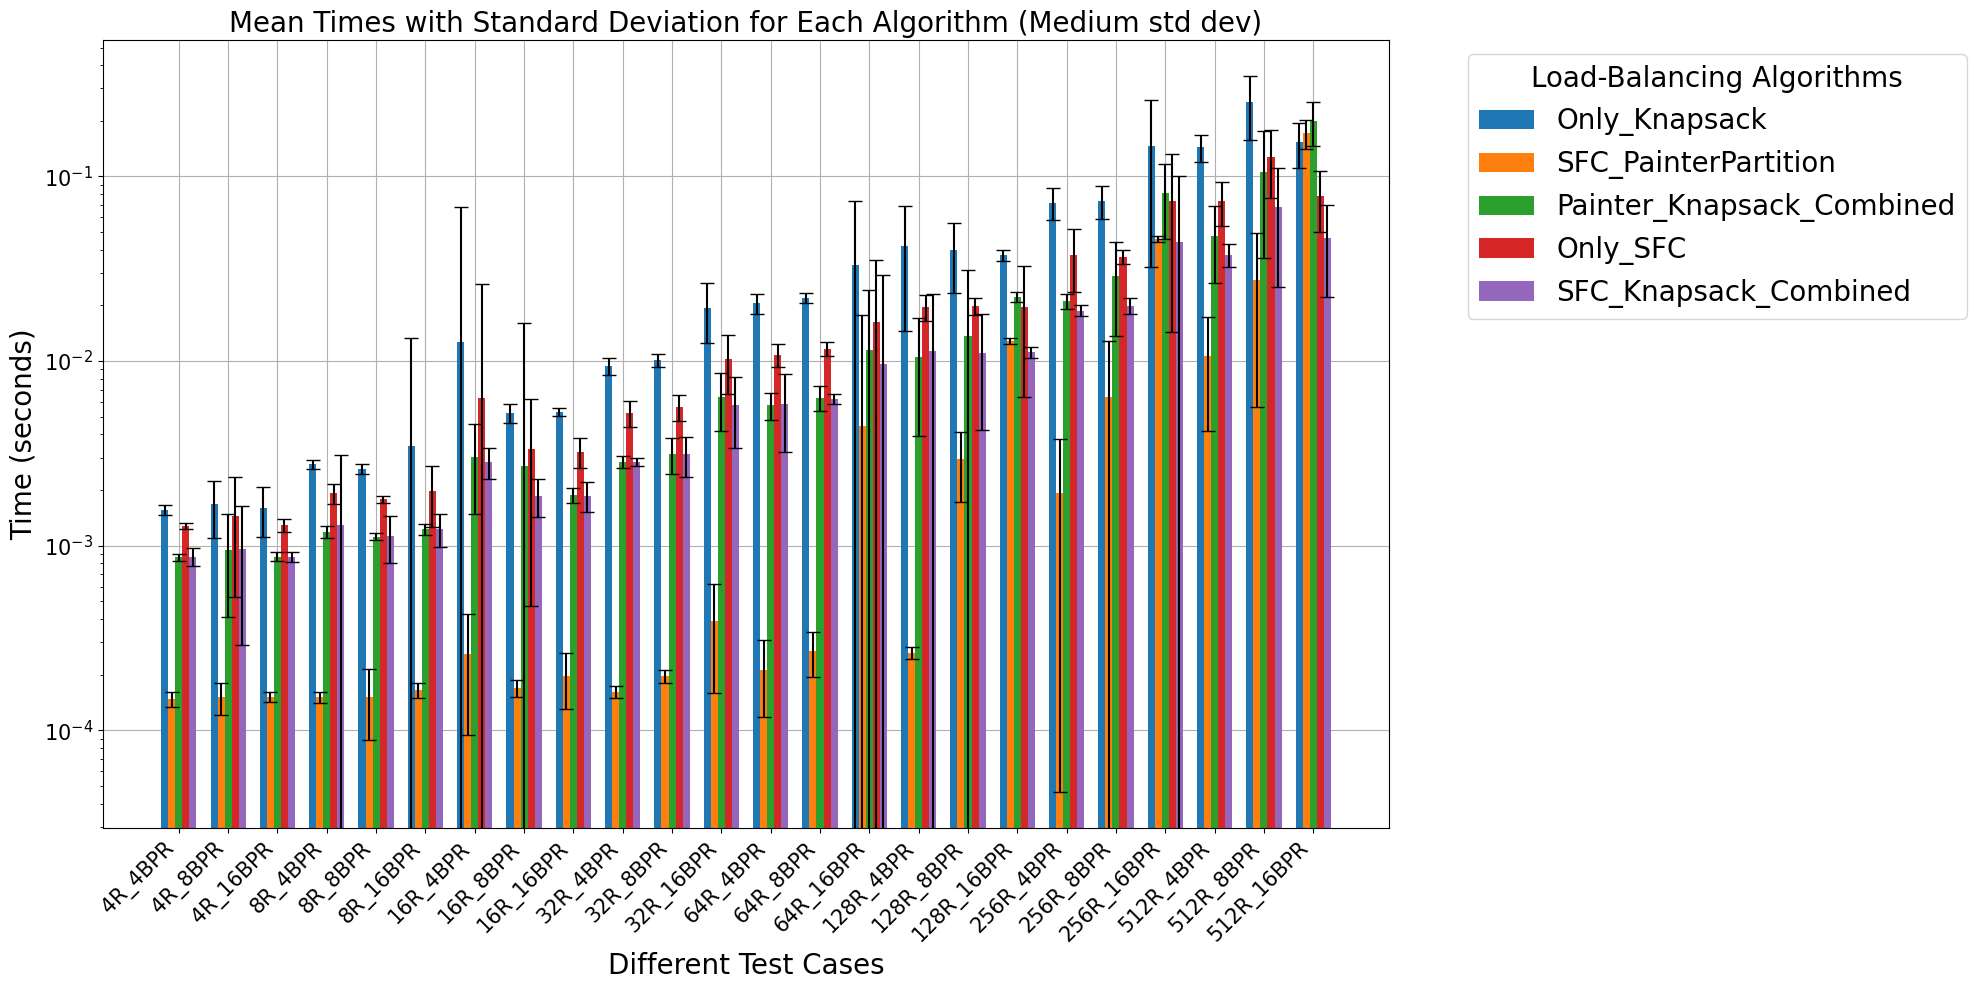

In [26]:

time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(time)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(time):
    mean_col = f'{alg}_Final_Time_mean'
    std_col = f'{alg}_Final_Time_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
ax.grid(True)
ax.set_axisbelow(True)
# Set y-axis to logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Time (seconds)', fontsize=20)
ax.set_title('Mean Times with Standard Deviation for Each Algorithm (Medium std dev)', fontsize=20)
ax.set_xticks(x + width*(len(time)-1)/2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
plt.margins(x=0.05)
plt.tight_layout()
# plt.savefig('../result/new_result/result_avg/time_errorbarplot.png', dpi=600)
plt.show()

In [27]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']

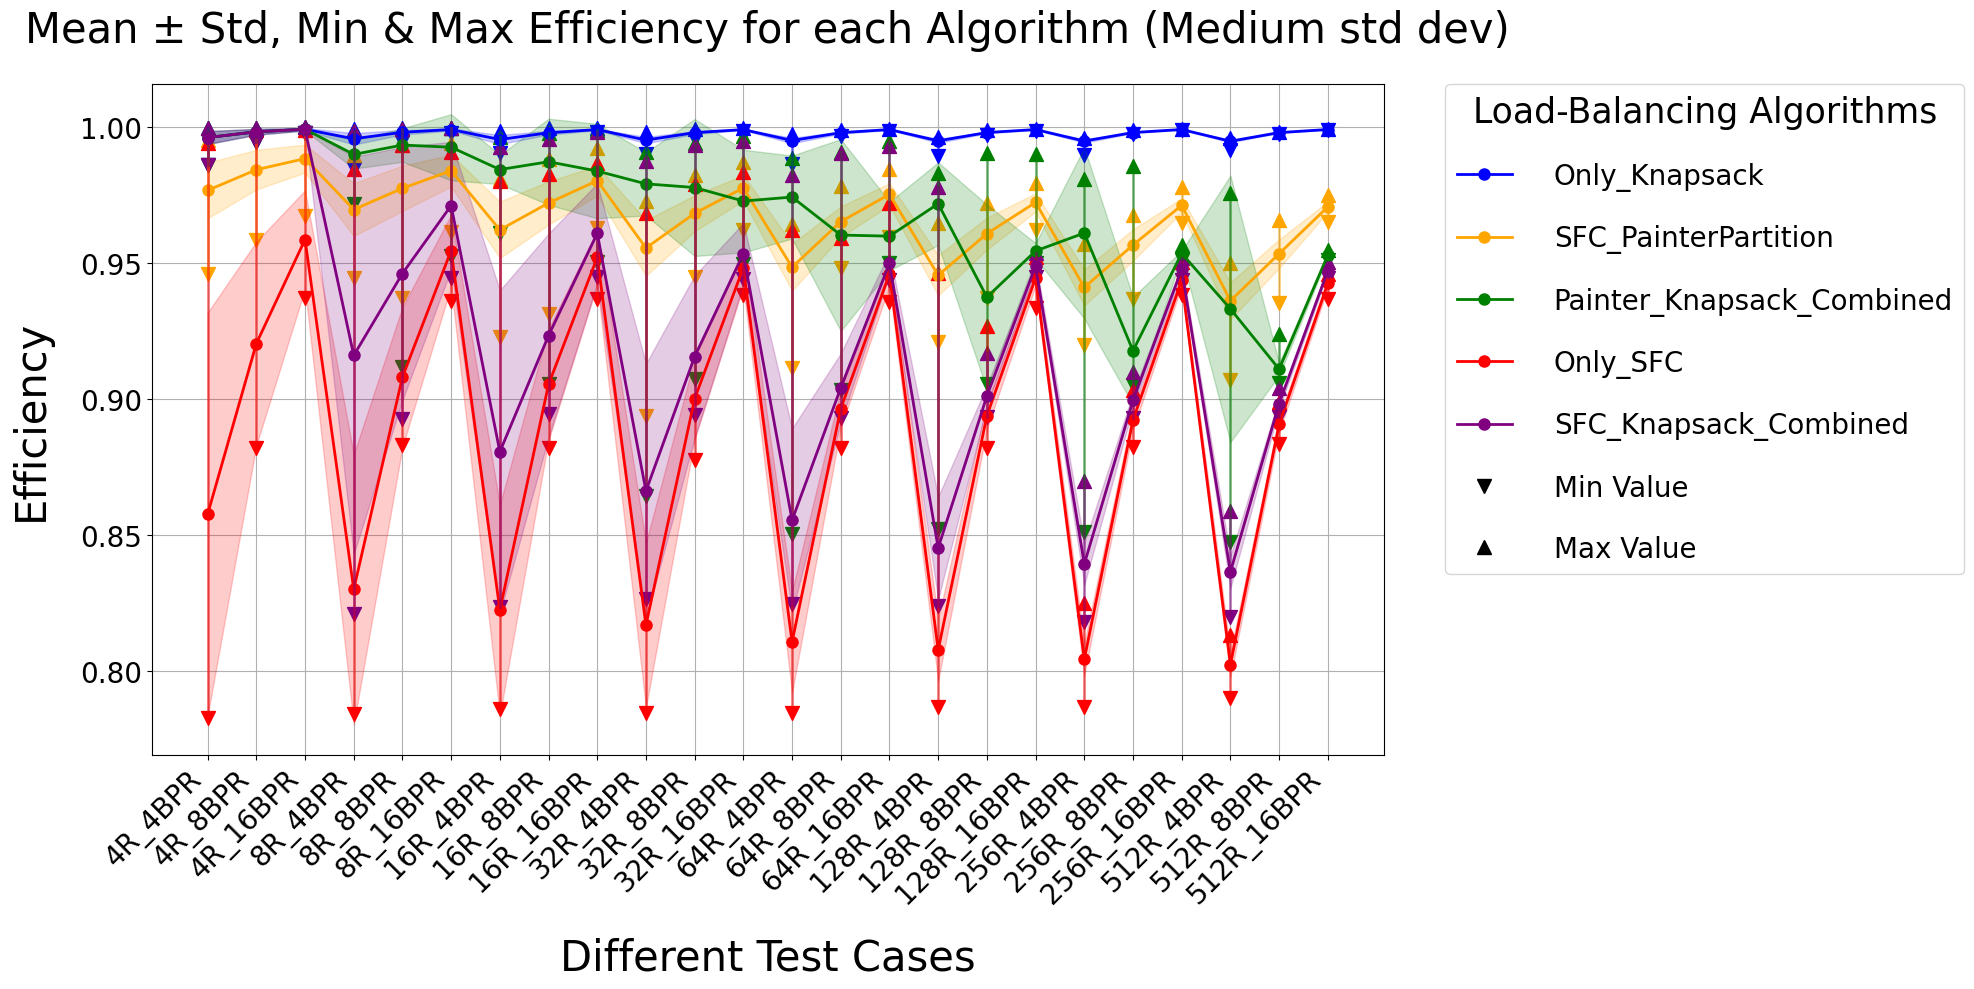

In [28]:

algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
colors = ['blue', 'orange', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency for each Algorithm (Medium std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_avg/efficiency_all_stats.png', dpi=600)
plt.show()





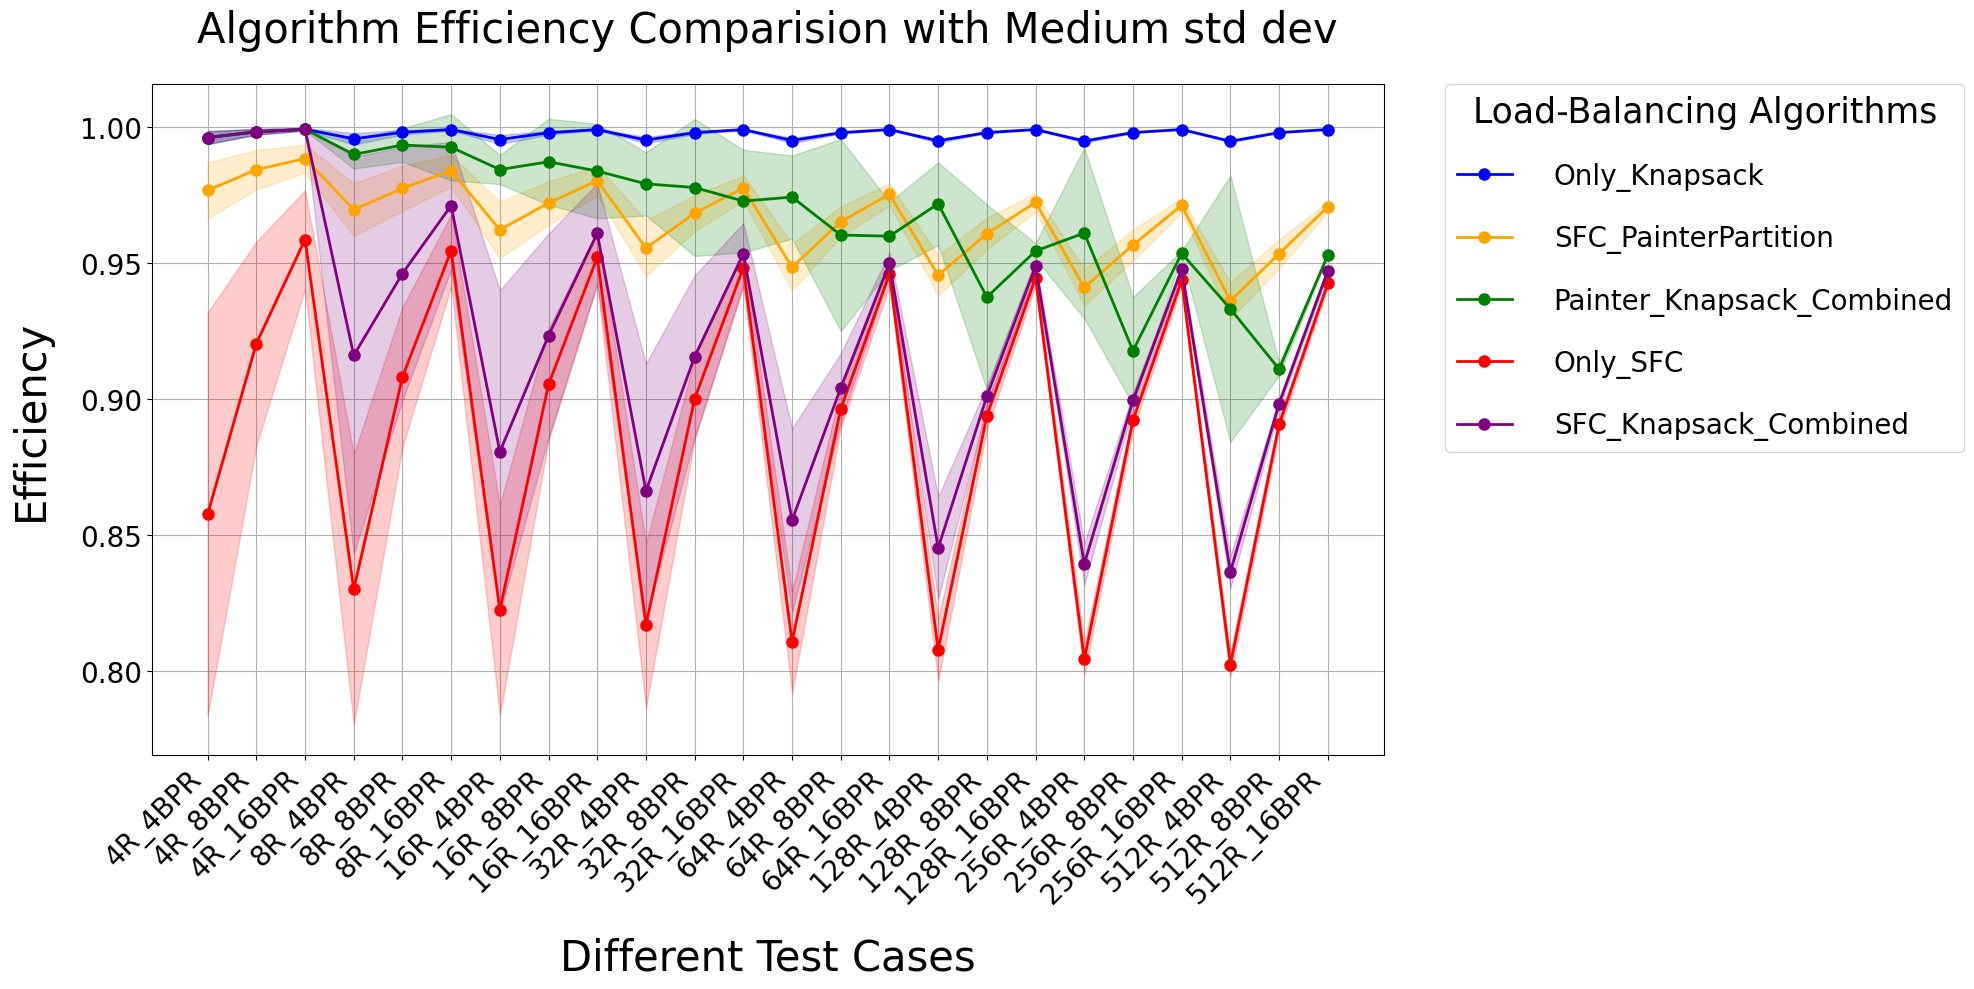

In [29]:
algorithms = [
    'Only_Knapsack', 
    'SFC_PainterPartition', 
    'Painter_Knapsack_Combined', 
    'Only_SFC', 
    'SFC_Knapsack_Combined'
]
colors = ['blue', 'orange', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Comparision with Medium std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/new_result/result_avg/efficiency_all_stats_nominmax.png', dpi=600)
plt.show()

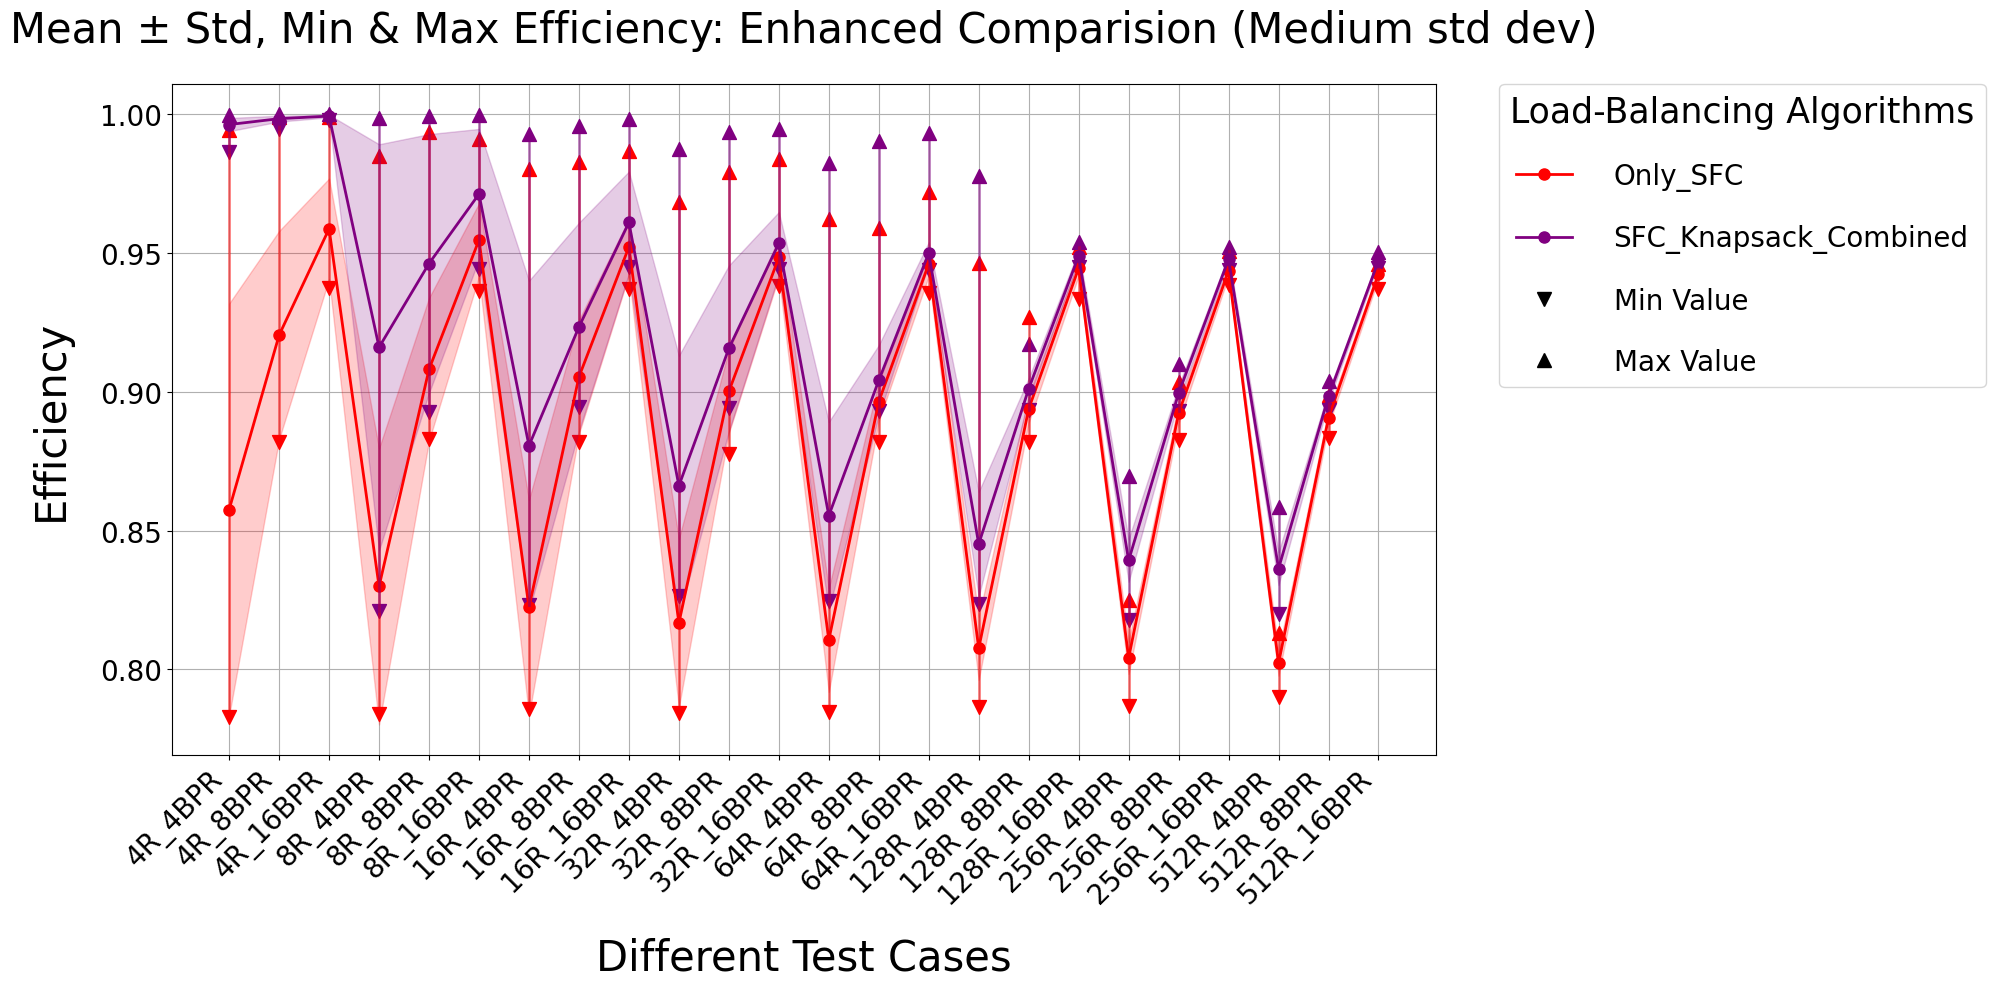

In [30]:


algorithms = ['Only_SFC', 'SFC_Knapsack_Combined']
colors = ['red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency: Enhanced Comparision (Medium std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_avg/efficiency_all_stats_2.png', dpi=600)
plt.show()



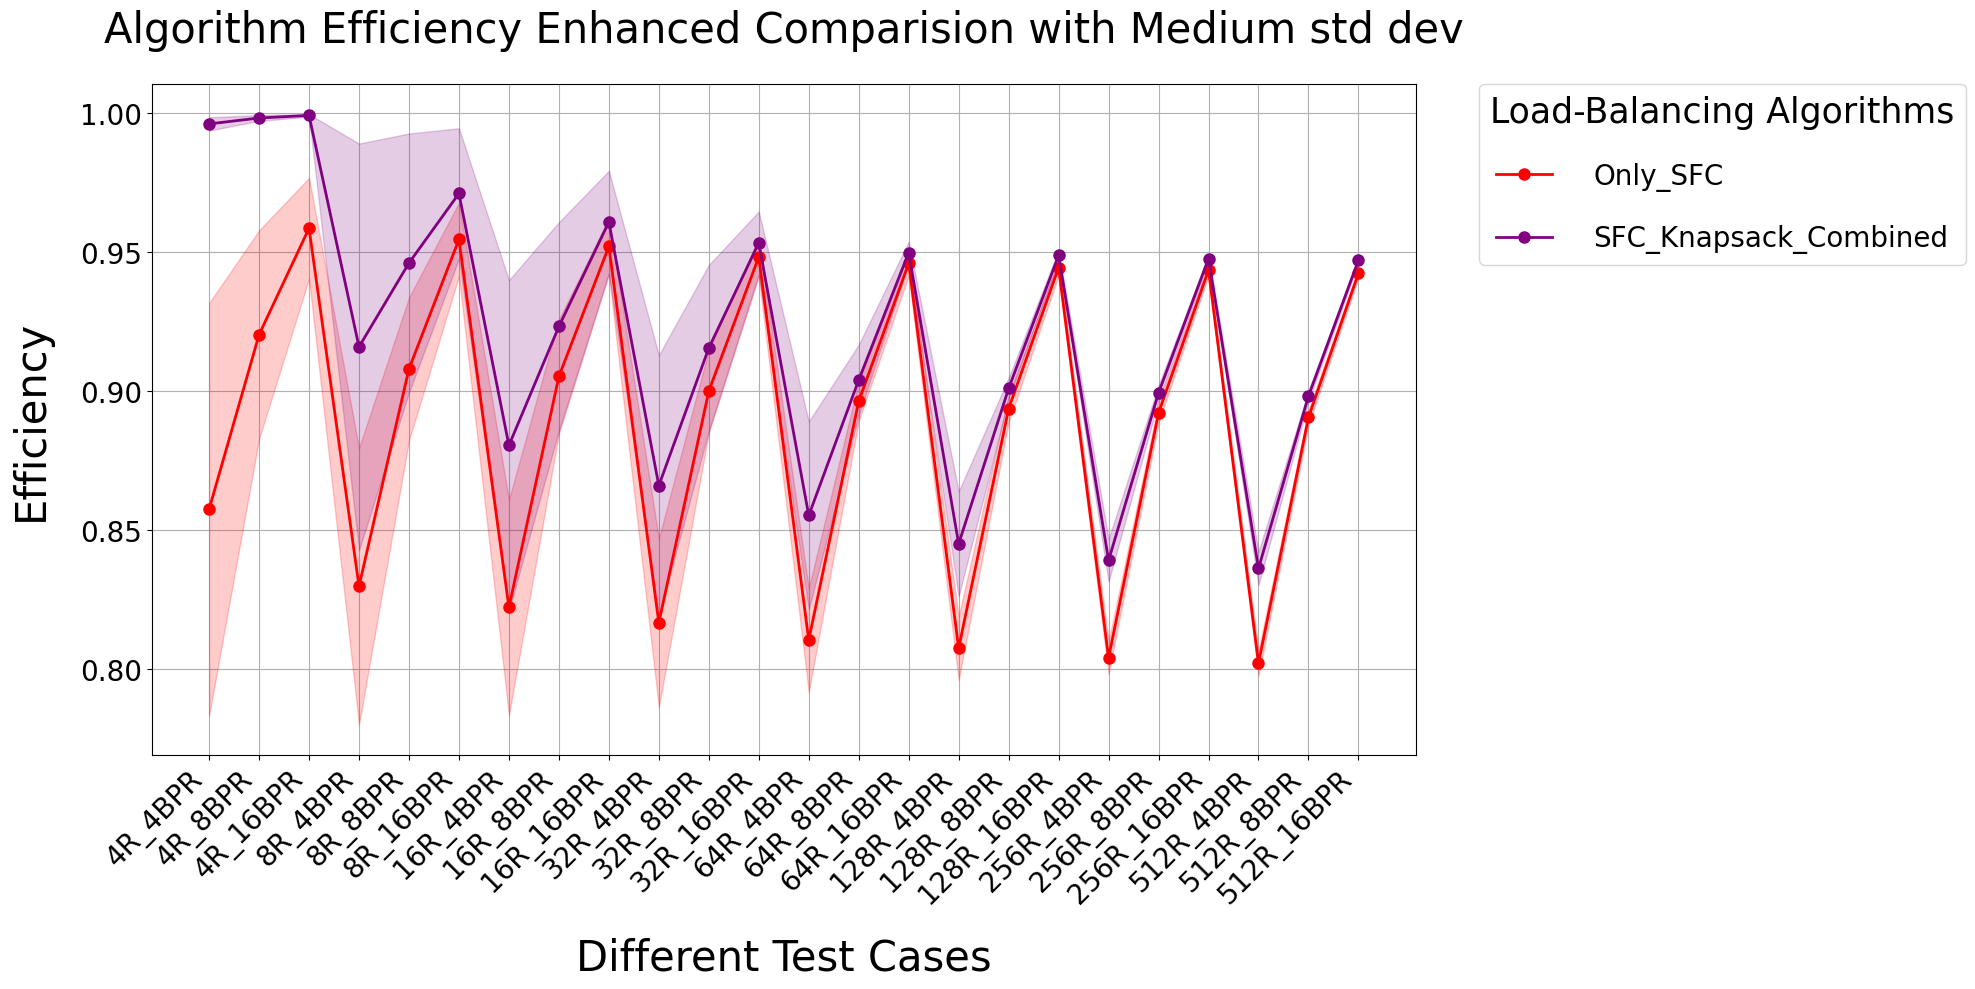

In [31]:
algorithms = ['Only_SFC', 'SFC_Knapsack_Combined']
colors = ['red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Enhanced Comparision with Medium std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/new_result/result_avg/efficiency_all_stats_2_nominmax.png', dpi=600)
plt.show()

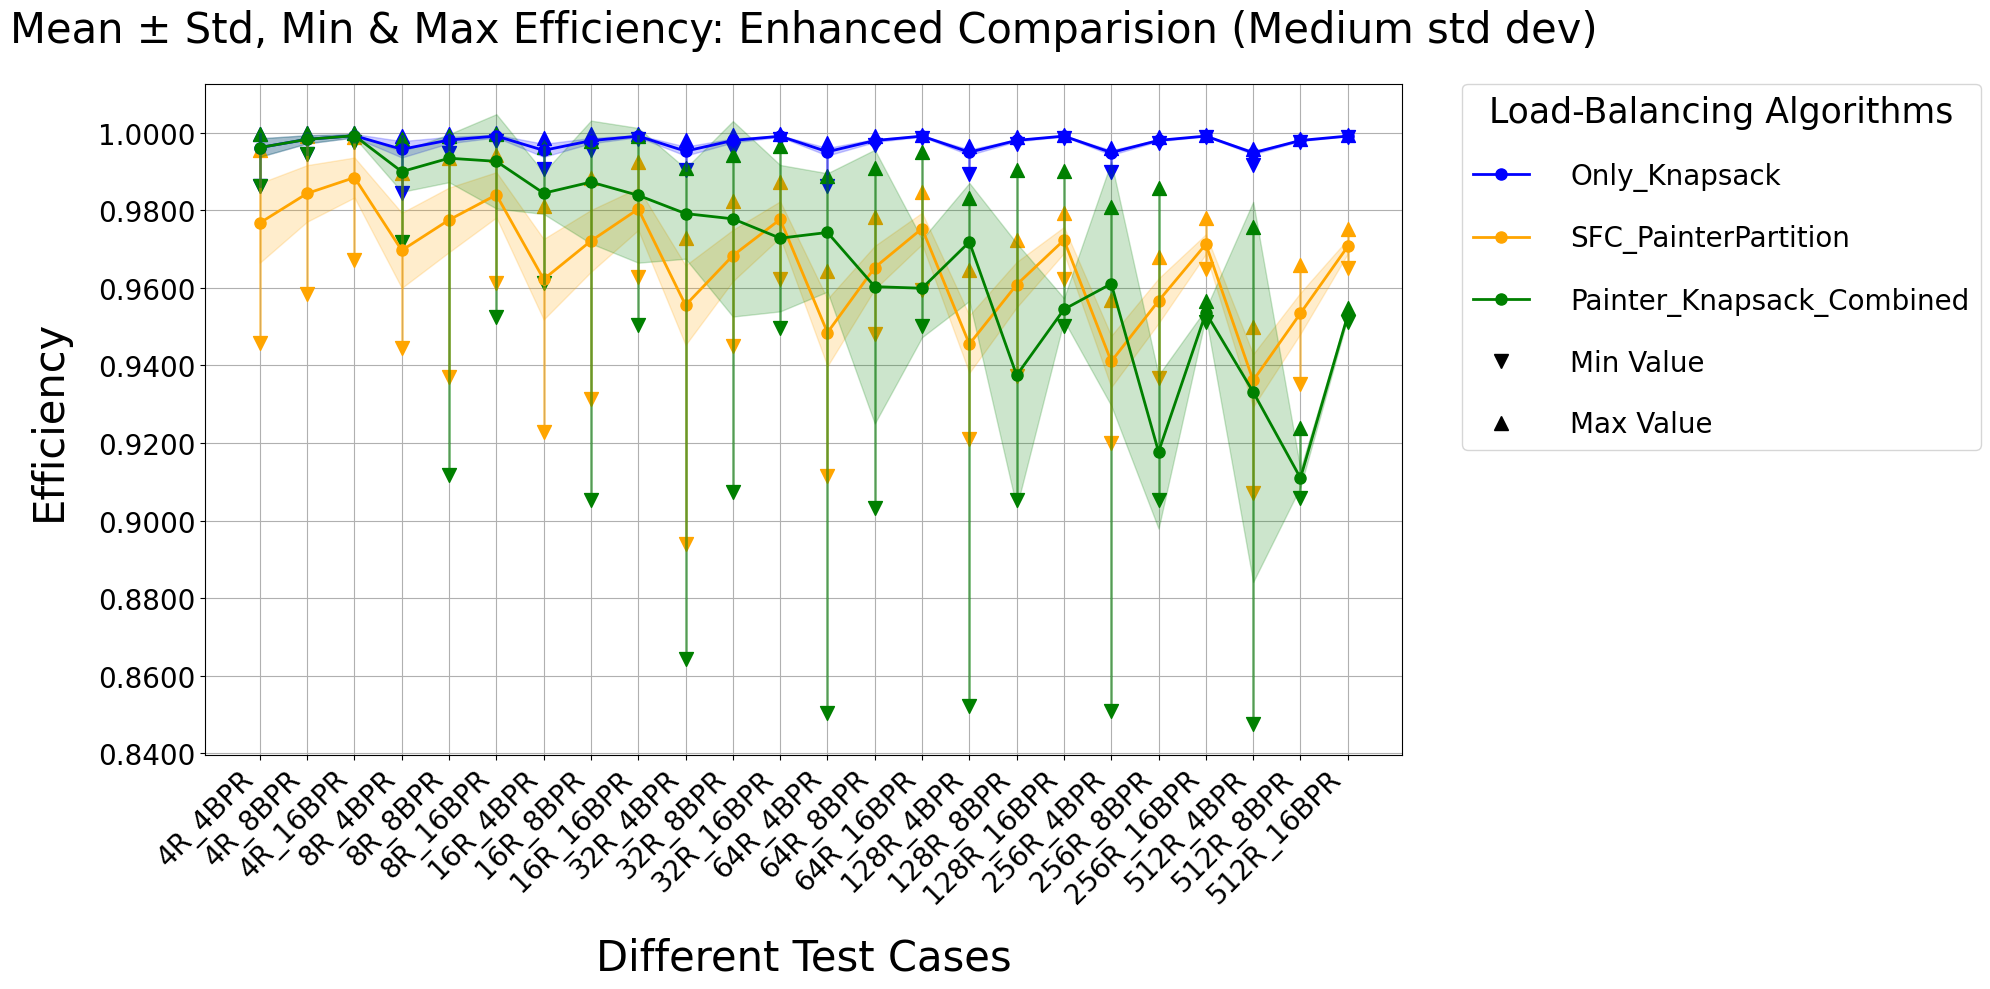

In [32]:
# algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']


algorithms = ['Only_Knapsack', 'SFC_PainterPartition','Painter_Knapsack_Combined']
colors = ['blue','orange', 'green']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  

    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency: Enhanced Comparision (Medium std dev)', pad=30, fontsize=30)
# ax.set_ylim(0.990, 1.0005)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.4f'))
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')
handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
# plt.savefig('../result/new_result/result_avg/efficiency_all_stats_3.png', dpi=600)
plt.show()


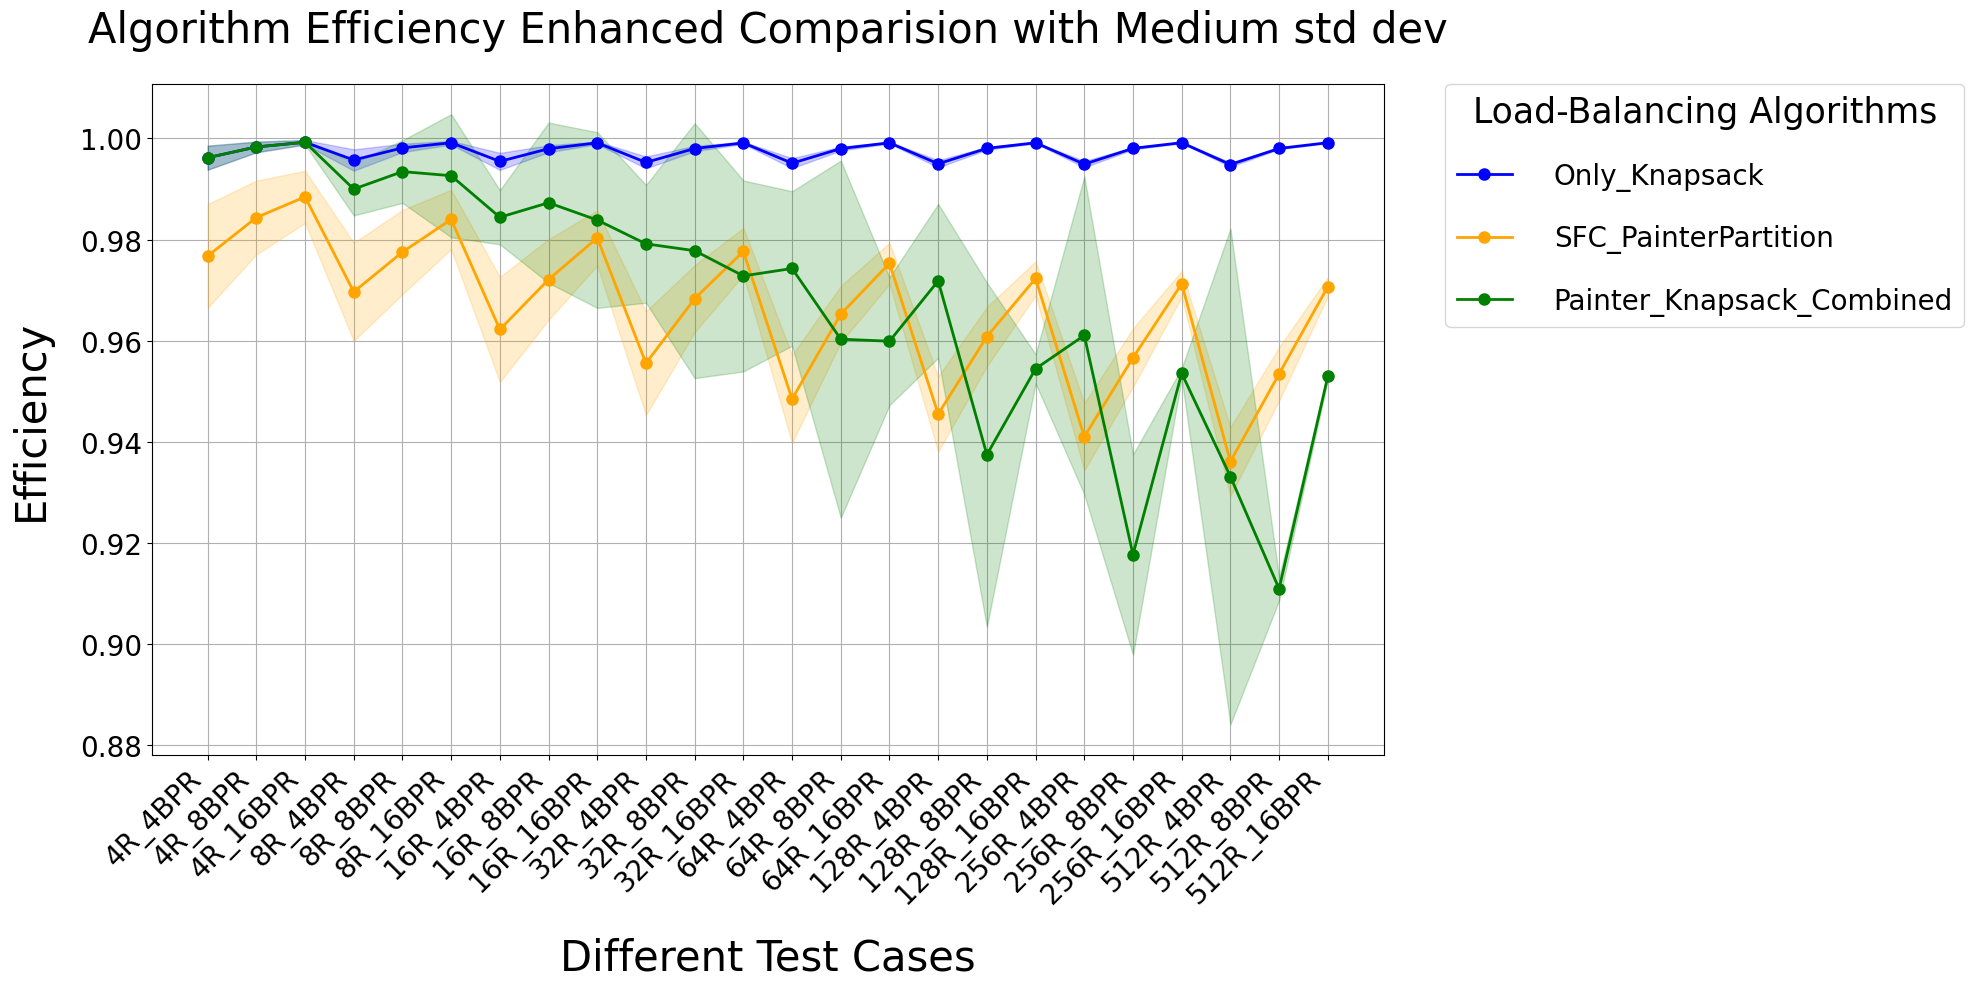

In [33]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition','Painter_Knapsack_Combined']
colors = ['blue','orange', 'green']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Enhanced Comparision with Medium std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/new_result/result_avg/efficiency_all_stats_3_nominmax.png', dpi=600)
plt.show()

In [34]:
grouped

File  Only_Knapsack_Efficiency_mean  Only_Knapsack_Efficiency_std  \
0      4R_4BPR                       0.996196                      0.002378   
1      4R_8BPR                       0.998323                      0.001056   
2     4R_16BPR                       0.999247                      0.000446   
3      8R_4BPR                       0.995743                      0.002108   
4      8R_8BPR                       0.998136                      0.000827   
5     8R_16BPR                       0.999159                      0.000362   
6     16R_4BPR                       0.995467                      0.001684   
7     16R_8BPR                       0.997973                      0.000685   
8    16R_16BPR                       0.999141                      0.000265   
9     32R_4BPR                       0.995263                      0.001173   
10    32R_8BPR                       0.998015                      0.000526   
11   32R_16BPR                       0.999125                      0.000200   
12    64R_4BPR                       0.995112                      0.000991   
13    64R_8BPR                       0.998000                      0.000391   
14   64R_16BPR                       0.999146                      0.000148   
15   128R_4BPR                       0.994986                      0.000712   
16   128R_8BPR                       0.998044                      0.000269   
17  128R_16BPR                       0.999148                      0.000121   
18   256R_4BPR                       0.994913                      0.000618   
19   256R_8BPR                       0.998047                      0.000216   
20  256R_16BPR                       0.999160                      0.000091   
21   512R_4BPR                       0.994847                      0.000423   
22   512R_8BPR                       0.998025                      0.000144   
23  512R_16BPR                       0.999161                      0.000066   

    Only_Knapsack_Efficiency_min  Only_Knapsack_Efficiency_max  \
0                       0.986188                      0.999667   
1                       0.994658                      0.999847   
2                       0.997695                      0.999935   
3                       0.984526                      0.999199   
4                       0.994697                      0.999586   
5                       0.997977                      0.999854   
6                       0.990538                      0.998748   
7                       0.995658                      0.999564   
8                       0.998346                      0.999785   
9                       0.990320                      0.998078   
10                      0.995733                      0.999454   
11                      0.998514                      0.999598   
12                      0.986387                      0.997340   
13                      0.996786                      0.999056   
14                      0.998608                      0.999499   
15                      0.989269                      0.996523   
16                      0.997052                      0.998960   
17                      0.998640                      0.999441   
18                      0.989932                      0.996023   
19                      0.997444                      0.998858   
20                      0.998837                      0.999384   
21                      0.991713                      0.995867   
22                      0.997656                      0.998416   
23                      0.998944                      0.999371   

    SFC_PainterPartition_Efficiency_mean  SFC_PainterPartition_Efficiency_std  \
0                               0.976759                             0.010257   
1                               0.984370                             0.007285   
2                               0.988457                             0.005162   
3                               0.969676                   

In [35]:

# time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']

# fig, ax = plt.subplots(figsize=(20, 10))

# for i, alg in enumerate(time):
#     alg_name = alg  

#     mean_col = f'{alg_name}_Final_Time_mean'
#     std_col = f'{alg_name}_Final_Time_std'
#     min_col = f'{alg_name}_Final_Time_min'
#     max_col = f'{alg_name}_Final_Time_max'

#     alg_color = colors[i]
#     ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
#     lower_bound = np.maximum(grouped[mean_col] - grouped[std_col], 1e-5) 
#     upper_bound = grouped[mean_col] + grouped[std_col]

#     ax.fill_between(
#         x,
#         lower_bound,
#         upper_bound,
#         color=alg_color,
#         alpha=0.2
#     )
#     for j, file_name in enumerate(grouped['File']):
#         min_val = grouped[min_col].iloc[j]
#         max_val = grouped[max_col].iloc[j]
#         ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
#         ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
#         ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

# ax.set_xticks(x)
# ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
# ax.set_xlabel('Different Test Cases (R --> Ranks, BPR --> Boxes per Rank)', fontsize=30, labelpad=20)
# ax.set_ylabel('Time (seconds)', fontsize=30, labelpad=20)
# ax.set_title('Mean ± Std, Min & Max Time for each Algorithm (Low std dev)', pad=30, fontsize=30)
# ax.tick_params(axis='both', which='major', labelsize=20)
# ax.set_yscale('log')
# ax.set_ylim(1e-6, 0)  

# min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
# max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

# handles, labels = ax.get_legend_handles_labels()
# handles += [min_marker, max_marker]
# labels += ['Min Value', 'Max Value']

# ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
#           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
# ax.grid(True)
# ax.set_axisbelow(True)

# plt.tight_layout()
# # plt.savefig('../result/new_result/result_best/time_all_stats.png', dpi=600)
# plt.show()




In [36]:
# time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']

# fig, ax = plt.subplots(figsize=(20, 10))

# for i, alg in enumerate(time):
#     alg_name = alg  

#     mean_col = f'{alg_name}_Final_Time_mean'
#     min_col = f'{alg_name}_Final_Time_min'
#     max_col = f'{alg_name}_Final_Time_max'

#     alg_color = colors[i]

#     ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
#     for j, file_name in enumerate(grouped['File']):
#         min_val = grouped[min_col].iloc[j]
#         max_val = grouped[max_col].iloc[j]

#         ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)

#         ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)

#         ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)


# ax.set_xticks(x)
# ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
# ax.set_xlabel('Different Test Cases (R --> Ranks, BPR --> Boxes per Rank)', fontsize=30,labelpad=20)
# ax.set_ylabel('Time (seconds)', fontsize=30,  labelpad=20)
# ax.set_title('Mean, Min & Max Time for each Algorithm (Low std dev)', pad=30, fontsize=30)
# ax.tick_params(axis='both', which='major', labelsize=20)

# ax.set_yscale('log')
# ax.set_ylim(1e-7, 0)  


# min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
# max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

# handles, labels = ax.get_legend_handles_labels()
# handles += [min_marker, max_marker]
# labels += ['Min Value', 'Max Value']

# ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=20, fontsize=20,
#           bbox_to_anchor=(1.05, 1), loc='upper left',  borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
# ax.grid(True)
# ax.set_axisbelow(True)

# plt.tight_layout()
# # plt.savefig('../result/new_result/result_best/time_all_stats_2.png', dpi=600)
# plt.show()




In [37]:
grouped

File  Only_Knapsack_Efficiency_mean  Only_Knapsack_Efficiency_std  \
0      4R_4BPR                       0.996196                      0.002378   
1      4R_8BPR                       0.998323                      0.001056   
2     4R_16BPR                       0.999247                      0.000446   
3      8R_4BPR                       0.995743                      0.002108   
4      8R_8BPR                       0.998136                      0.000827   
5     8R_16BPR                       0.999159                      0.000362   
6     16R_4BPR                       0.995467                      0.001684   
7     16R_8BPR                       0.997973                      0.000685   
8    16R_16BPR                       0.999141                      0.000265   
9     32R_4BPR                       0.995263                      0.001173   
10    32R_8BPR                       0.998015                      0.000526   
11   32R_16BPR                       0.999125                      0.000200   
12    64R_4BPR                       0.995112                      0.000991   
13    64R_8BPR                       0.998000                      0.000391   
14   64R_16BPR                       0.999146                      0.000148   
15   128R_4BPR                       0.994986                      0.000712   
16   128R_8BPR                       0.998044                      0.000269   
17  128R_16BPR                       0.999148                      0.000121   
18   256R_4BPR                       0.994913                      0.000618   
19   256R_8BPR                       0.998047                      0.000216   
20  256R_16BPR                       0.999160                      0.000091   
21   512R_4BPR                       0.994847                      0.000423   
22   512R_8BPR                       0.998025                      0.000144   
23  512R_16BPR                       0.999161                      0.000066   

    Only_Knapsack_Efficiency_min  Only_Knapsack_Efficiency_max  \
0                       0.986188                      0.999667   
1                       0.994658                      0.999847   
2                       0.997695                      0.999935   
3                       0.984526                      0.999199   
4                       0.994697                      0.999586   
5                       0.997977                      0.999854   
6                       0.990538                      0.998748   
7                       0.995658                      0.999564   
8                       0.998346                      0.999785   
9                       0.990320                      0.998078   
10                      0.995733                      0.999454   
11                      0.998514                      0.999598   
12                      0.986387                      0.997340   
13                      0.996786                      0.999056   
14                      0.998608                      0.999499   
15                      0.989269                      0.996523   
16                      0.997052                      0.998960   
17                      0.998640                      0.999441   
18                      0.989932                      0.996023   
19                      0.997444                      0.998858   
20                      0.998837                      0.999384   
21                      0.991713                      0.995867   
22                      0.997656                      0.998416   
23                      0.998944                      0.999371   

    SFC_PainterPartition_Efficiency_mean  SFC_PainterPartition_Efficiency_std  \
0                               0.976759                             0.010257   
1                               0.984370                             0.007285   
2                               0.988457                             0.005162   
3                               0.969676                   

In [38]:
columns_to_keep = ['File','Only_Knapsack_Efficiency_mean', 'Only_SFC_Efficiency_mean', 'SFC_PainterPartition_Efficiency_mean', 'Painter_Knapsack_Combined_Efficiency_mean', 'SFC_Knapsack_Combined_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'Only_SFC_Final_Time_mean', 'SFC_PainterPartition_Final_Time_mean', 'Painter_Knapsack_Combined_Final_Time_mean', 'SFC_Knapsack_Combined_Final_Time_mean' ]
new_df = grouped[columns_to_keep]


In [39]:
new_df

File  Only_Knapsack_Efficiency_mean  Only_SFC_Efficiency_mean  \
0      4R_4BPR                       0.996196                  0.857560   
1      4R_8BPR                       0.998323                  0.920378   
2     4R_16BPR                       0.999247                  0.958671   
3      8R_4BPR                       0.995743                  0.829908   
4      8R_8BPR                       0.998136                  0.908078   
5     8R_16BPR                       0.999159                  0.954629   
6     16R_4BPR                       0.995467                  0.822310   
7     16R_8BPR                       0.997973                  0.905350   
8    16R_16BPR                       0.999141                  0.952122   
9     32R_4BPR                       0.995263                  0.816722   
10    32R_8BPR                       0.998015                  0.900100   
11   32R_16BPR                       0.999125                  0.948340   
12    64R_4BPR                       0.995112                  0.810571   
13    64R_8BPR                       0.998000                  0.896459   
14   64R_16BPR                       0.999146                  0.946051   
15   128R_4BPR                       0.994986                  0.807611   
16   128R_8BPR                       0.998044                  0.893796   
17  128R_16BPR                       0.999148                  0.944528   
18   256R_4BPR                       0.994913                  0.804162   
19   256R_8BPR                       0.998047                  0.892215   
20  256R_16BPR                       0.999160                  0.943631   
21   512R_4BPR                       0.994847                  0.802224   
22   512R_8BPR                       0.998025                  0.890617   
23  512R_16BPR                       0.999161                  0.942495   

    SFC_PainterPartition_Efficiency_mean  \
0                               0.976759   
1                               0.984370   
2                               0.988457   
3                               0.969676   
4                               0.977538   
5                               0.983998   
6                               0.962234   
7                               0.972110   
8                               0.980338   
9                               0.955549   
10                              0.968333   
11                              0.977662   
12                              0.948481   
13                              0.965252   
14                              0.975312   
15                              0.945515   
16                              0.960827   
17                              0.972330   
18                              0.941031   
19                              0.956650   
20                              0.971260   
21                              0.936119   
22                              0.953454   
23                              0.970690   

    Painter_Knapsack_Combined_Efficiency_mean  \
0                                    0.996196   
1                                    0.998323   
2                                    0.999247   
3                                    0.989989   
4                                    0.993446   
5                                    0.992636   
6                                    0.984422   
7                                    0.987292   
8                                    0.983869   
9                                    0.979162   
10                                   0.977810   
11                                   0.972822   
12                                   0.974294   
13                                   0.960317   
14                                   0.959910   
15                                   0.971842   
16                                   0.937467   
17                                   0.954466   
18                                   0.961059   
19                                   0.917717   
20  

In [40]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

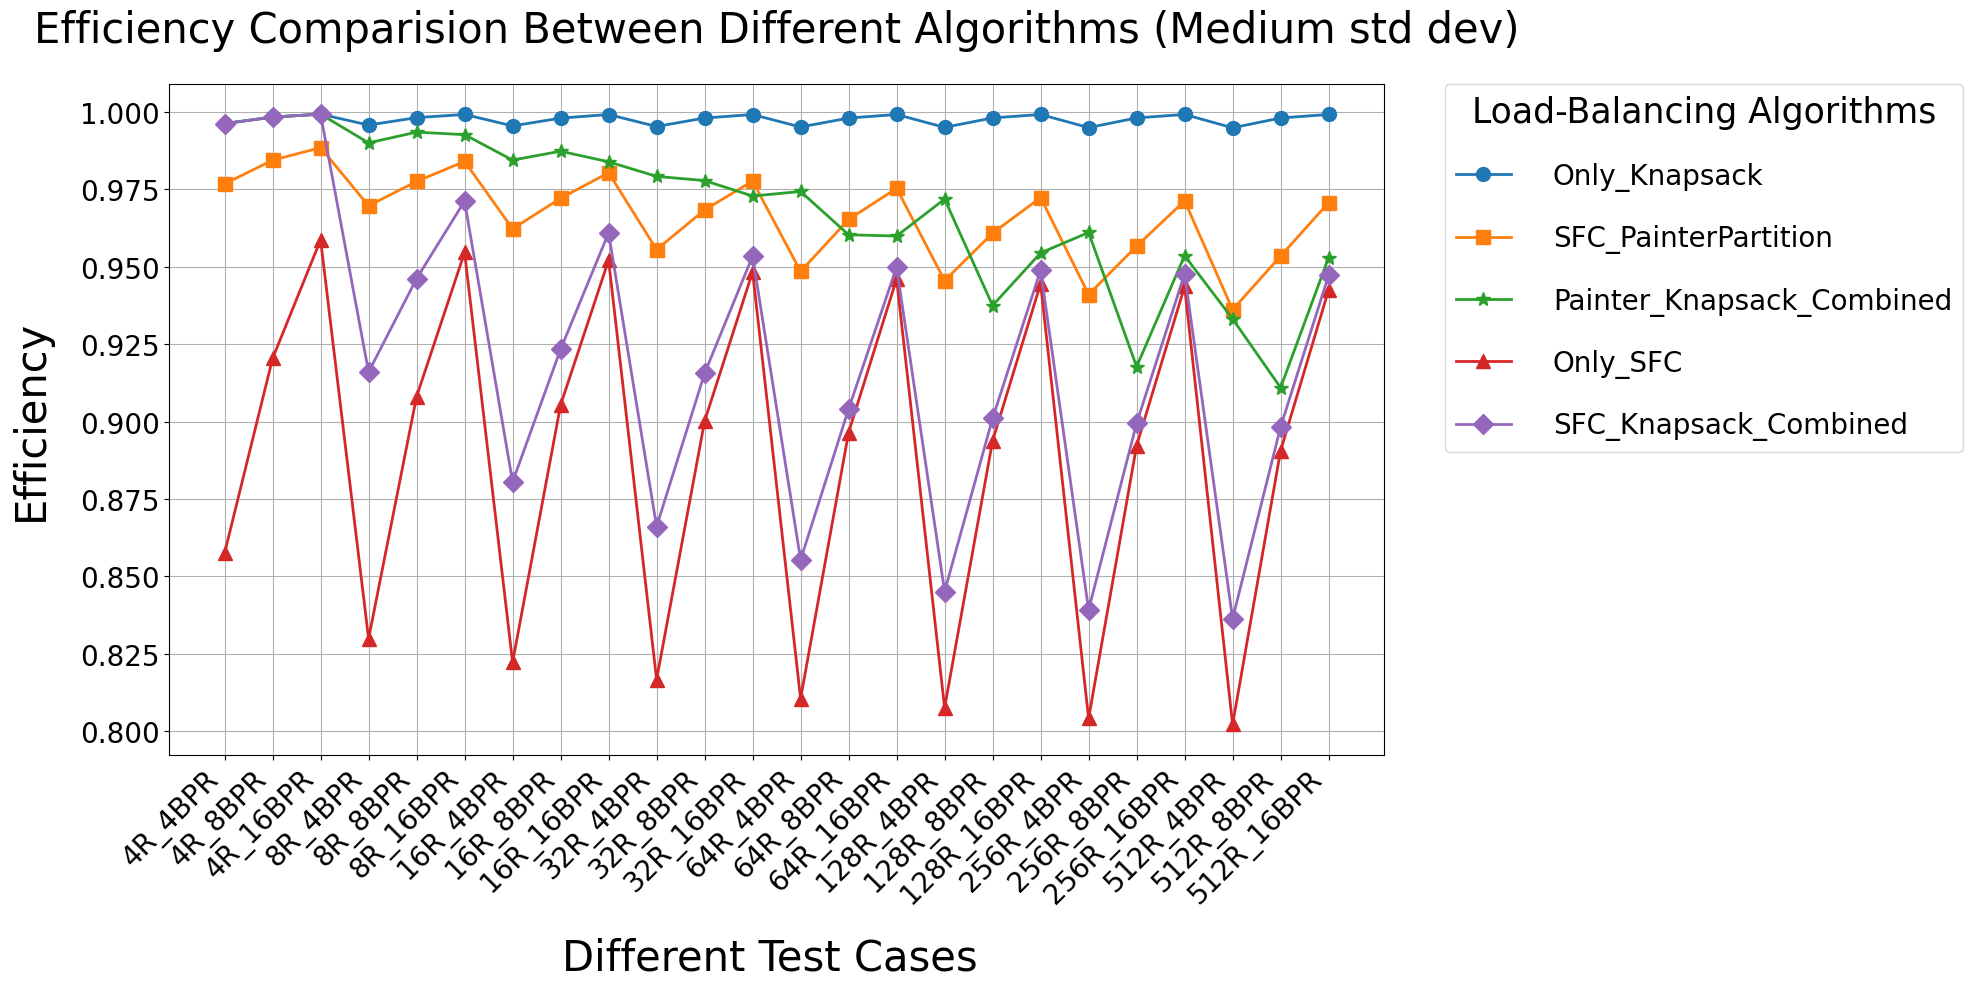

In [41]:
algorithms = [
    ('Only_Knapsack', 'Only_Knapsack_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'o'),
    ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency_mean', 'SFC_PainterPartition_Final_Time_mean', 's'),
    ('Painter_Knapsack_Combined', 'Painter_Knapsack_Combined_Efficiency_mean', 'Painter_Knapsack_Combined_Final_Time_mean', '*'),
    ('Only_SFC', 'Only_SFC_Efficiency_mean', 'Only_SFC_Final_Time_mean', '^'),
    ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency_mean', 'SFC_Knapsack_Combined_Final_Time_mean', 'D')
]

x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[eff_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases ', fontsize=30,labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,  labelpad=20)
ax.set_title('Efficiency Comparision Between Different Algorithms (Medium std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)


ax.legend(title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)

ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_avg/efficiency.png', dpi=600)
plt.show()





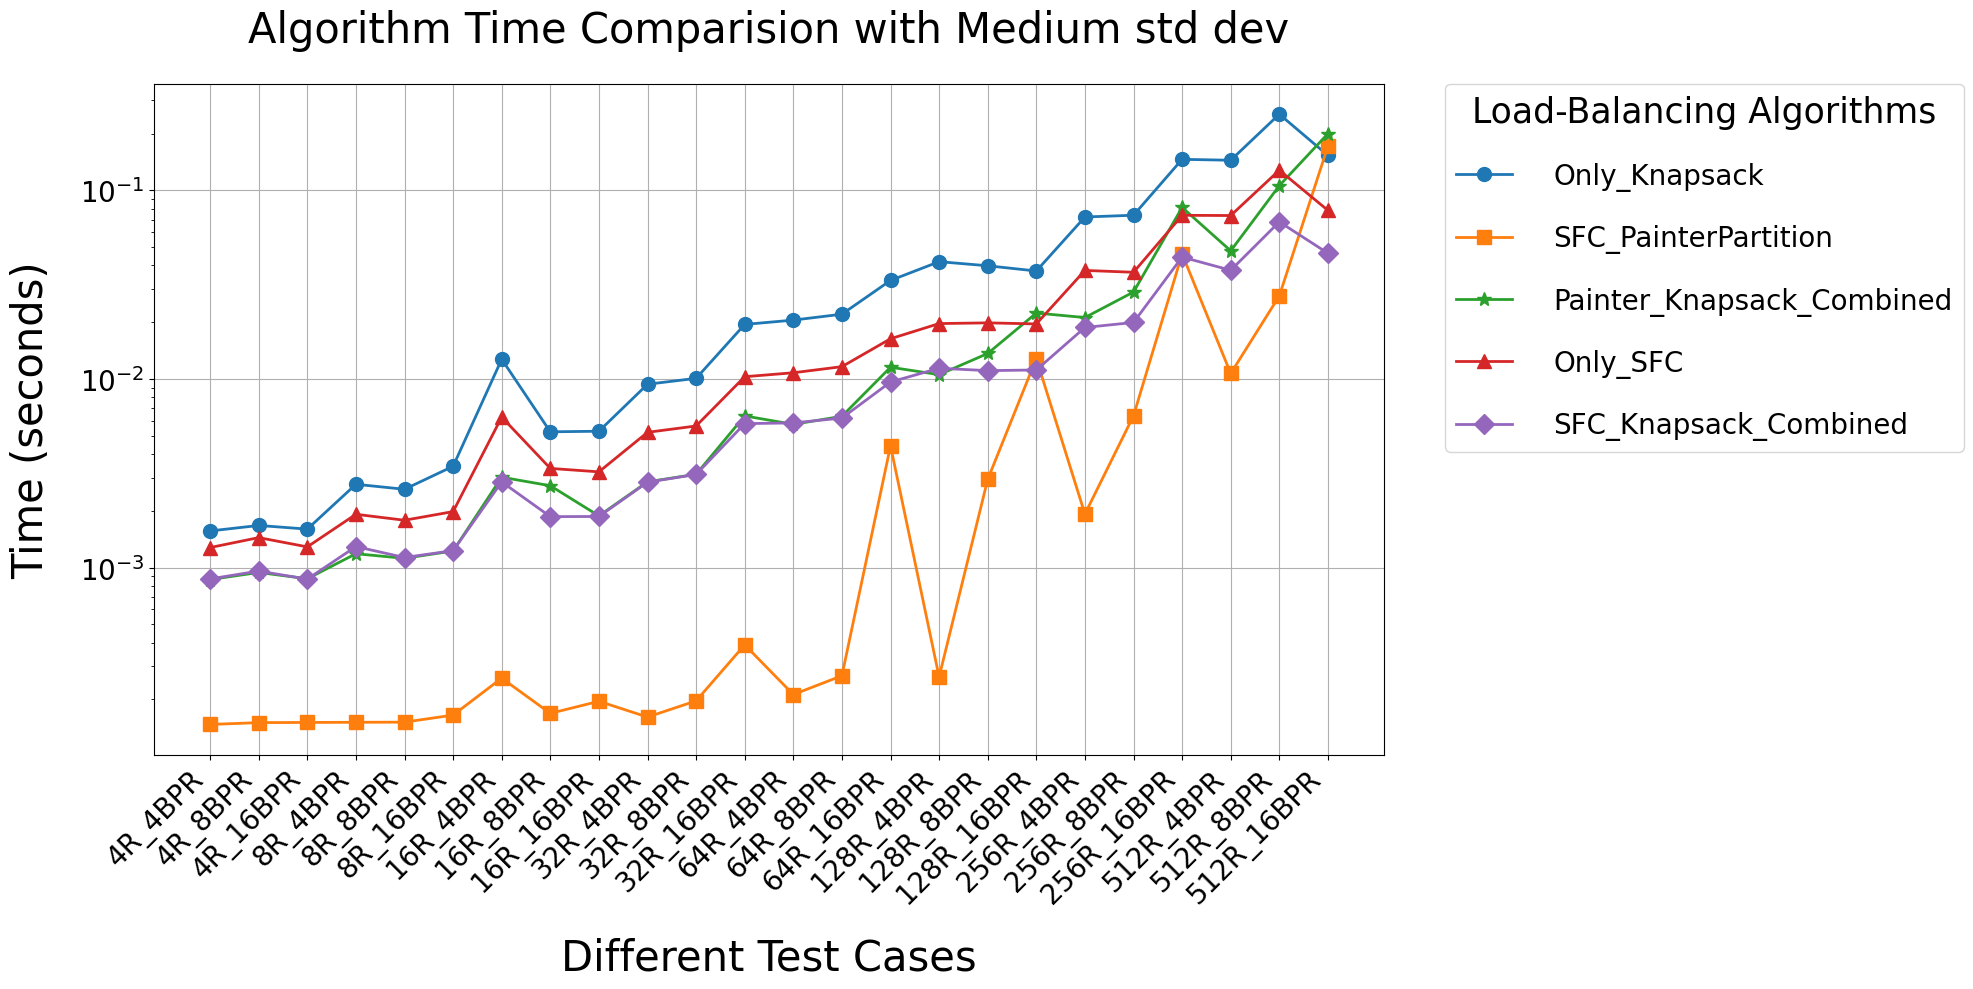

In [42]:
# fig, ax = plt.subplots(figsize=(20, 10))

# for alg_name, eff_col, time_col, marker in algorithms:
#     ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
# ax.set_xticks(x)
# ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
# ax.set_xlabel('File', fontsize=15)
# ax.set_ylabel('Time (seconds)', fontsize=15)
# ax.set_title('Time Means by File and Algorithm', fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=15)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

# plt.tight_layout()
# plt.show()


x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Time (seconds)',  fontsize=30,  labelpad=20)
ax.set_title('Algorithm Time Comparision with Medium std dev', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
ax.set_yscale('log')
plt.tight_layout()
plt.savefig('../result/new_result/result_avg/time.png', dpi=600)
plt.show()


